In [2]:
import os
import datascout as ds
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
import glob 

In [3]:
# Plotting parameters
params = {'legend.fontsize': 20,
          'figure.figsize': (8, 7),
          'axes.labelsize': 25,
          'axes.titlesize': 21,
          'xtick.labelsize': 23,
          'ytick.labelsize': 23,
          'image.cmap': 'jet',
          'lines.linewidth': 2,
          'lines.markersize': 10,
          'font.family': 'sans-serif'}


plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)
plt.ion()

plt.close('all')

In [57]:
path2files = './SPS.USER.LHCMD4-MD_CRAB_26_200_L3034_Q26_2021_V1/emit_growth/'
files_list = sorted(glob.glob(path2files+'*PM1*'))

print(files_list)
files2ignore_list = []

['./SPS.USER.LHCMD4-MD_CRAB_26_200_L3034_Q26_2021_V1/emit_growth/2021.09.14.22.24.40.935000_SPS.BWS.41677.V-PM1.parquet', './SPS.USER.LHCMD4-MD_CRAB_26_200_L3034_Q26_2021_V1/emit_growth/2021.09.14.22.24.40.935000_SPS.BWS.51637.H-PM1.parquet', './SPS.USER.LHCMD4-MD_CRAB_26_200_L3034_Q26_2021_V1/emit_growth/2021.09.14.22.25.45.735000_SPS.BWS.41677.V-PM1.parquet', './SPS.USER.LHCMD4-MD_CRAB_26_200_L3034_Q26_2021_V1/emit_growth/2021.09.14.22.26.50.535000_SPS.BWS.41677.V-PM1.parquet', './SPS.USER.LHCMD4-MD_CRAB_26_200_L3034_Q26_2021_V1/emit_growth/2021.09.14.22.27.12.135000_SPS.BWS.41677.V-PM1.parquet', './SPS.USER.LHCMD4-MD_CRAB_26_200_L3034_Q26_2021_V1/emit_growth/2021.09.14.22.27.33.735000_SPS.BWS.51637.H-PM1.parquet', './SPS.USER.LHCMD4-MD_CRAB_26_200_L3034_Q26_2021_V1/emit_growth/2021.09.14.22.31.52.935000_SPS.BWS.51637.H-PM1.parquet', './SPS.USER.LHCMD4-MD_CRAB_26_200_L3034_Q26_2021_V1/emit_growth/2021.09.14.22.50.14.535000_SPS.BWS.41677.V-PM1.parquet', './SPS.USER.LHCMD4-MD_CRAB_26_2

In [58]:
# find best choice between PM1 and PM2
positionX_list, positionY_list, profilesX_list, profilesY_list, daysX_list, daysY_list  = [], [], [], []

for filename in files_list:
    if filename not in files2ignore_list:
        
        data = ds.parquet_to_awkward(filename) # type: awkward.highlevel.Array
        print(data.fields) # print the keys of the wkward array
        quit()
        acq = data['cycleStamp'][0]/1e9+ data[f'acq_time_Set1'][0]/1e6 # sec
        t_corr = 2*3600

        if '51637.H' in filename:
            emitX_list.append(data['emittance_Set1'][0][0])
            daysX_list.append(md.epoch2num(acq+t_corr))  # Convert UNIX time to days since Matplotlib epoch.
        if '41677.V' in filename:
            emitY_list.append(data['emittance_Set1'][0][0])
            daysY_list.append(md.epoch2num(acq+t_corr))  # Convert UNIX time to days since Matplotlib epoch.
    else:
        print(f'file {filename} ignored')

ValueError: not enough values to unpack (expected 6, got 4)

In [59]:
data = ds.parquet_to_awkward(files_list[1])
print(files_list[1])
data_fields_list = data.fields
print(data_fields_list)

./SPS.USER.LHCMD4-MD_CRAB_26_200_L3034_Q26_2021_V1/emit_growth/2021.09.14.22.24.40.935000_SPS.BWS.51637.H-PM1.parquet
['device', 'cycleStamp', 'cycleSelector', 'pmSelection', 'voltageSet', 'intensity_Set1', 'emittance_Set1', 'emittance_average_Set1', 'emittance_std_Set1', 'sigma_Set1', 'sigma_betatronic_Set1', 'amplitude_Set1', 'area_Set1', 'acq_time_Set1', 'dpp_Set1', 'mask_Set1', 'bunchSelection_Set1', 'betagamma_Set1', 'bestChannel_Set1', 'beta_func_Set1', 'disp_func_Set1', 'profile_area_Set1', 'analysis_span_Set1', 'fit_func_Set1', 'fit_values_Set1', 'positions_Set1', 'profiles_Set1', 'intensity_Set2', 'emittance_Set2', 'emittance_average_Set2', 'emittance_std_Set2', 'sigma_Set2', 'sigma_betatronic_Set2', 'amplitude_Set2', 'area_Set2', 'acq_time_Set2', 'dpp_Set2', 'mask_Set2', 'bunchSelection_Set2', 'betagamma_Set2', 'bestChannel_Set2', 'beta_func_Set2', 'disp_func_Set2', 'profile_area_Set2', 'analysis_span_Set2', 'fit_func_Set2', 'fit_values_Set2', 'positions_Set2', 'profiles_Set2

In [61]:
data['amplitude_Set2']

<Array [[0.000752]] type='1 * option[var * ?float64]'>

In [51]:
my_index = 29
print(data_fields_list[my_index])
data[data_fields_list[my_index]]

emittance_average_Set2


<Array [1.22e-06] type='1 * ?float64'>

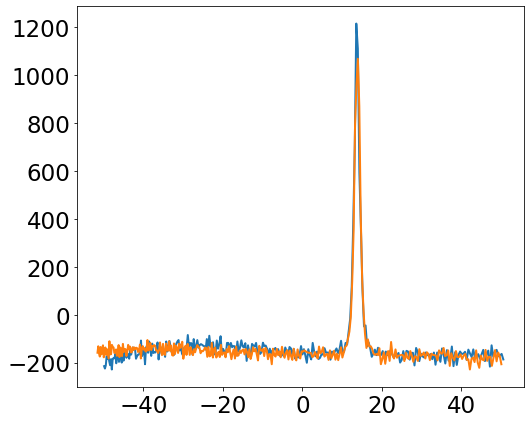

In [47]:
plt.plot(data['positions_Set1'][0][0], data['profiles_Set1'][0][0])
plt.plot(data['positions_Set2'][0][0], data['profiles_Set2'][0][0])

[[[1.22e+03, 13.8, 0.752, -158, 0]]]


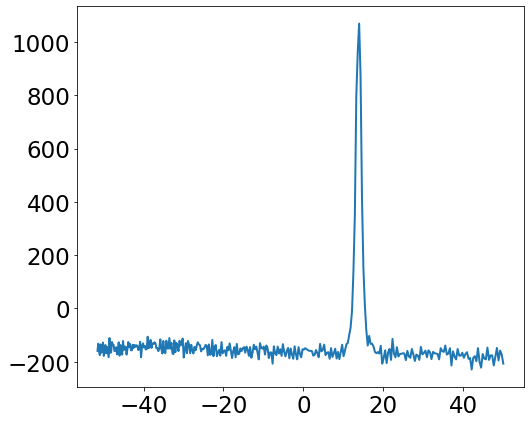

In [56]:
plt.plot(data['positions_Set2'][0][0], data['profiles_Set2'][0][0])
#plt.plot(data['positions_Set2'][0][0], data['fit_values_Set2'][0])
print(data['fit_values_Set2'])

Slope H: 3.5161143561967406e-05
Intercept : -25.95060814650697
Slope V: 1.2266757500195408e-05
Intercept : -9.053453268521181


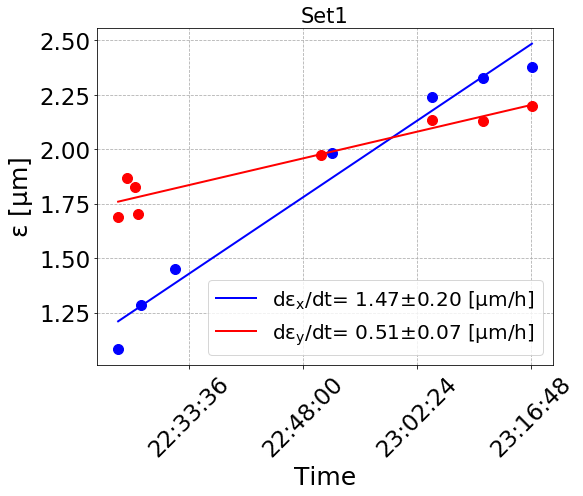

In [38]:
# compute the emit grwoth in m/day
[mX, bX], covX = np.polyfit(daysX_list, emitX_list, deg=1, cov=True)
[mY, bY], covY = np.polyfit(daysY_list, emitY_list, deg=1, cov=True)

errX = np.sqrt(np.diag(covX))[0]
errY = np.sqrt(np.diag(covY))[0]

print ("Slope H: " + str(mX))
print ("Intercept : " + str(bX))

print ("Slope V: " + str(mY))
print ("Intercept : " + str(bY))

fig, ax = plt.subplots(1)

xfmt = md.DateFormatter('%H:%M:%S')

ax.plot(daysX_list, np.array(emitX_list)*1e6, 'o', c='b')
ax.plot(daysY_list, np.array(emitY_list)*1e6, 'o', c='r')

ax.plot(daysX_list, (np.array(daysX_list)*mX+bX)*1e6, c='b', label=r'$\mathrm{d\epsilon_x/dt}$'+f'= {mX*1e6/24:.2f}'+r'$\pm$'+f'{errX*1e6/24:.2f} '+r'$\mathrm{[\mu m/h]}$')
ax.plot(daysY_list, (np.array(daysY_list)*mY+bY)*1e6, c='r', label=r'$\mathrm{d\epsilon_y/dt}$'+f'= {mY*1e6/24:.2f}'+r'$\pm$'+f'{errY*1e6/24:.2f} '+r'$\mathrm{[\mu m/h]}$')

ax.set_title(f'{my_set}')
ax.set_xlabel('Time')
ax.set_ylabel(r'$\mathrm{\epsilon \ [\mu m]}$')
ax.legend()
plt.setp(ax.get_xticklabels(), rotation=45)
plt.gca().xaxis.set_major_formatter(xfmt)
plt.grid(ls='--')
plt.tight_layout()

plt.savefig(f'emit_vs_time_{my_set}.png', bbox_inches='tight')

#plt.show()




2021.09.14.22.24.40.935000_SPS.BWS.41677.V-PM1.parquet


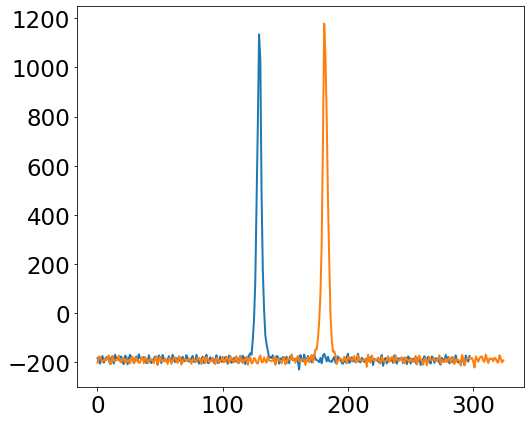

In [213]:
data = ds.parquet_to_awkward(path2files+files_list[0]) # type: awkward.highlevel.Array
print(files_list[0])
#data.fields
plt.plot(np.array(data['profiles_Set1'][0][0]))
plt.plot(np.array(data['profiles_Set2'][0][0]))

2021.09.14.22.24.40.935000_SPS.BWS.41677.V-PM2.parquet


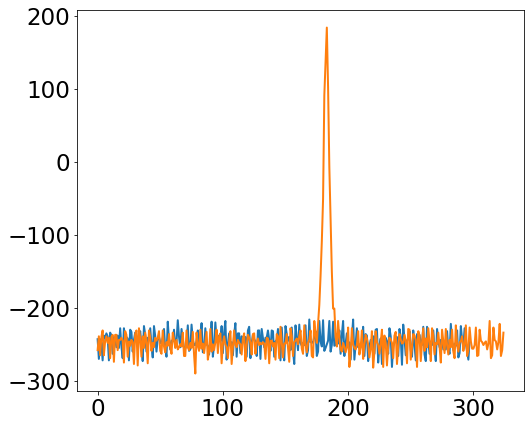

In [215]:
data = ds.parquet_to_awkward(path2files+files_list[1]) # type: awkward.highlevel.Array
print(files_list[1])
#data.fields
plt.plot(np.array(data['profiles_Set1'][0][0]))
plt.plot(np.array(data['profiles_Set2'][0][0]))

In [216]:
data['emittance_Set1']

<Array [[3.89e-09]] type='1 * option[var * ?float64]'>

In [156]:
# find best choice between PM1 and PM2
for filename in files_list[0:1]:
    if filename not in files2ignore_list:
        data = ds.parquet_to_awkward(filename) # type: awkward.highlevel.Array
        pd_data = ak.to_pandas(data) # convert awkward arrays to pandas for easier manipilation
        print(pd_data['profiles_Set1'])
        #print(pd_data['bestChannel_Set1'])

entry  subentry  subsubentry
0      0         0             -184
                 1             -178
                 2             -205
                 3             -190
                 4             -174
Name: profiles_Set1, dtype: int64


In [139]:
path2files = './SPS.USER.LHCMD4-MD_CRAB_26_200_L3034_Q26_2021_V1/emit_growth/'

files_list = sorted(glob.glob(path2files+'*PM1*'))
print(len(files_list))

# files to be ignored from the plotting and the fit
files2ignore_list = ['info.txt']

15


In [127]:
data = ds.parquet_to_awkward(files_list[1]) # type: awkward.highlevel.Array
pd_data = ak.to_pandas(data) # convert awkward arrays to pandas for easier manipilation
keys = pd_data.keys()
print(keys)

Index(['device', 'cycleStamp', 'cycleSelector', 'pmSelection', 'voltageSet',
       'intensity_Set1', 'emittance_Set1', 'emittance_average_Set1',
       'emittance_std_Set1', 'sigma_Set1', 'sigma_betatronic_Set1',
       'amplitude_Set1', 'area_Set1', 'acq_time_Set1', 'dpp_Set1', 'mask_Set1',
       'bunchSelection_Set1', 'betagamma_Set1', 'bestChannel_Set1',
       'beta_func_Set1', 'disp_func_Set1', 'profile_area_Set1',
       'analysis_span_Set1', 'fit_func_Set1', 'fit_values_Set1',
       'positions_Set1', 'profiles_Set1', 'intensity_Set2', 'emittance_Set2',
       'emittance_average_Set2', 'emittance_std_Set2', 'sigma_Set2',
       'sigma_betatronic_Set2', 'amplitude_Set2', 'area_Set2', 'acq_time_Set2',
       'dpp_Set2', 'mask_Set2', 'bunchSelection_Set2', 'betagamma_Set2',
       'bestChannel_Set2', 'beta_func_Set2', 'disp_func_Set2',
       'profile_area_Set2', 'analysis_span_Set2', 'fit_func_Set2',
       'fit_values_Set2', 'positions_Set2', 'profiles_Set2'],
      dtype='obje

In [128]:
pd_data['bestChannel_Set2']

entry  subentry  subsubentry
0      0         0              2
                 1              2
                 2              2
                 3              2
                 4              2
Name: bestChannel_Set2, dtype: int64

In [ ]:
pd_data['emittance_Set2']*1e6

In [112]:
key = keys[15]
print(key)
print(pd_data[key])
print(type(pd_data[key][0][0][0]))
print(pd_data[key][0][0][2])

mask_Set1
entry  subentry  subsubentry
0      0         0              True
                 1              True
                 2              True
                 3              True
                 4              True
Name: mask_Set1, dtype: bool
<class 'numpy.bool_'>
True


In [102]:
pd_data['profiles_Set1'][0][0]

subsubentry
0   -239
1   -234
2   -219
3   -225
4   -212
Name: profiles_Set1, dtype: int64

In [103]:
entry = 0
subentries = np.arange(0, 80) # how many bunches
subsubentry=0

# select bunch
bunch = subentries[0]
# select IN (Set 1) or OUT (Set 2)
my_set = 'Set1' # 'Set2'

emitH_list, emitV_list, daysH_list, daysV_list  = [], [], [], []

for filename in files_list:
    if filename not in files2ignore_list:
        data = ds.parquet_to_awkward(filename) # type: awkward.highlevel.Array
        pd_data = ak.to_pandas(data) # convert awkward arrays to pandas for easier manipilation

        acq = pd_data['cycleStamp'][0][bunch][0]/1e9+ pd_data[f'acq_time_{my_set}'][0][bunch][0]/1e6 # sec
        t_corr = 2*3600

        if '51637.H' in filename:
            emitH_list.append(pd_data[f'emittance_{my_set}'][0][bunch][0])
            daysH_list.append(md.epoch2num(acq+t_corr))  # Convert UNIX time to days since Matplotlib epoch.
        if '41677.V' in filename:
            emitV_list.append(pd_data[f'emittance_{my_set}'][0][bunch][0])
            daysV_list.append(md.epoch2num(acq+t_corr))  # Convert UNIX time to days since Matplotlib epoch.
    else:
        print(f'file {filename} ignored')


# compute the emit grwoth in m/day
[mH, bH], covH = np.polyfit(daysH_list, emitH_list, deg=1, cov=True)
[mV, bV], covV = np.polyfit(daysV_list, emitV_list, deg=1, cov=True)

errH = np.sqrt(np.diag(covH))[0]
errV = np.sqrt(np.diag(covV))[0]

print ("Slope H: " + str(mH))
print ("Intercept : " + str(bH))

print ("Slope V: " + str(mV))
print ("Intercept : " + str(bV))

fig, ax = plt.subplots(1)

xfmt = md.DateFormatter('%H:%M:%S')

ax.plot(daysH_list, np.array(emitH_list)*1e6, 'o', c='b')
ax.plot(daysV_list, np.array(emitV_list)*1e6, 'o', c='r')

ax.plot(daysH_list, (np.array(daysH_list)*mH+bH)*1e6, c='b', label=r'$\mathrm{d\epsilon_H/dt}$'+f'= {mH*1e6/24:.2f}'+r'$\pm$'+f'{errH*1e6/24:.2f} '+r'$\mathrm{[\mu m/h]}$')
ax.plot(daysV_list, (np.array(daysV_list)*mV+bV)*1e6, c='r', label=r'$\mathrm{d\epsilon_V/dt}$'+f'= {mV*1e6/24:.2f}'+r'$\pm$'+f'{errV*1e6/24:.2f} '+r'$\mathrm{[\mu m/h]}$')

ax.set_title(f'bunch {bunch}, {my_set}')
ax.set_xlabel('Time')
ax.set_ylabel(r'$\mathrm{\epsilon \ [\mu m]}$')
ax.legend()
plt.setp(ax.get_xticklabels(), rotation=45)
plt.gca().xaxis.set_major_formatter(xfmt)
plt.grid(ls='--')
plt.tight_layout()

plt.savefig(f'emit_vs_time_bunch{bunch}_{my_set}.png', bbox_inches='tight')

#plt.show()




ValueError: the number of data points must exceed order to scale the covariance matrix